In [36]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Sensoren-Vergleich-2022-09-13_1502.ods', dtype={'letzterWert': np.float64})

In [3]:
pd.options.display.float_format = "{:,.1f}".format

In [44]:
df.head(5)

,sensor_id,Gebäude (#id),mqtt_id,letzteMessung,letzterWert,unit
0,469,AlfredRandtStr14 (#138),AI_Allg_ATemp,2022-09-13 15:00:00.000 +0200,19.7,°C
1,1046,AlfredRandtStr20 (#157),AI_Allg_ATemp,2022-09-13 15:00:00.000 +0200,18.9,°C
2,1907,Weverstr71d (#110),AI_Allg_ATemp,2022-09-13 13:49:25.000 +0200,17.1,°C
3,581,AalesunderStr10 (#143),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,20.0,°C
4,473,AalesunderStr9 (#141),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,19.3,°C


# Overview

In [45]:
len(df['Gebäude (#id)'].unique())

192

Alle mqtt_ids, die vorkommen (einige nur einmal, einige mehrmals):

In [46]:
df['mqtt_id'].unique()

array(['AI_Allg_ATemp', 'AI_Allg_rATemp', 'AI_FW1_rRLTempPrim',
       'AI_FW1_rRLTempSek', 'AI_FW1_rVLTempPrim', 'AI_FW1_rVLTempSek',
       'AI_HVS1_HK1RLTemp', 'AI_HVS1_HK1VLTemp', 'AI_HVS1_rRLTemp',
       'AI_HVS1_rVLTemp', 'AI_HVS1_VLTemp', 'AI_HVS2_HK2RLTemp',
       'AI_HVS2_HK2VLTemp', 'AI_HVS2_rRLTemp', 'AI_HVS2_rVLTemp',
       'AI_HVS3_rRLTemp', 'AI_HVS3_rVLTemp', 'AI_HVS4_rRLTemp',
       'AI_HVS4_rVLTemp', 'AI_K1_RLTemp', 'AI_K1_rRLTemp',
       'AI_K1_rVLTemp', 'AI_K1_VLTemp', 'AI_K2_rRLTemp', 'AI_K2_rVLTemp',
       'AI_PS_rGVLTemp', 'AI_RTD1_rMesswert', 'AI_RTD2_rMesswert',
       'AI_RTD3_rMesswert', 'AI_RTD4_rMesswert', 'AI_RTD5_rMesswert',
       'AI_WWB1_BTemp1', 'AI_WWB1_BTemp2', 'AI_WWB1_rBTemp1',
       'AI_WWB1_rBTemp2', 'AI_WWB1_rPrimVLTemp', 'AI_WWB1_rRLTemp',
       'AI_WWB1_rRLTempPrim', 'AI_WWB1_rSekRLTemp', 'AI_WWB1_rSekVLTemp',
       'AI_WWB1_rVLTemp', 'AI_WWB2_rBTemp1', 'AI_WWB2_rSekRLTemp',
       'AI_WWB2_rVLTemp', 'AI_WWB_BTemp1', 'AI_WWB_BTemp2',
 

In [47]:
len(df['mqtt_id'].unique())

135

Von den 135 mqtt_ids kommen 78 mehrmals vor:

In [48]:
df['mqtt_id'][df['mqtt_id'].duplicated()].unique()

array(['AI_Allg_ATemp', 'AI_Allg_rATemp', 'AI_HVS1_rRLTemp',
       'AI_HVS1_rVLTemp', 'AI_HVS1_VLTemp', 'AI_HVS2_rRLTemp',
       'AI_HVS2_rVLTemp', 'AI_HVS3_rRLTemp', 'AI_HVS3_rVLTemp',
       'AI_K1_rRLTemp', 'AI_K1_rVLTemp', 'AI_K1_VLTemp', 'AI_K2_rRLTemp',
       'AI_K2_rVLTemp', 'AI_WWB1_BTemp1', 'AI_WWB1_BTemp2',
       'AI_WWB1_rBTemp1', 'AI_WWB1_rBTemp2', 'AI_WWB1_rPrimVLTemp',
       'AI_WWB1_rRLTemp', 'AI_WWB1_rRLTempPrim', 'AI_WWB1_rSekRLTemp',
       'AI_WWB1_rSekVLTemp', 'AI_WWB1_rVLTemp', 'AI_ZS_rZRLTemp',
       'AI_ZS_rZVLTemp', 'AI_ZS_ZRLTemp', 'AI_ZS_ZVLTemp',
       'Primary10_Temperatur', 'Primary1_Durchfluss', 'Primary1_Energie',
       'Primary1_Kubikmeter', 'Primary1_Leistung',
       'Primary1_Ruecklauftemperatur', 'Primary1_Vorlauftemperatur',
       'Primary2_Durchfluss', 'Primary2_Energie', 'Primary2_Kubikmeter',
       'Primary2_Leistung', 'Primary2_Ruecklauftemperatur',
       'Primary2_Vorlauftemperatur', 'Primary3_Durchfluss',
       'Primary3_Energie', 

In [52]:
len(df['mqtt_id'][df['mqtt_id'].duplicated()].unique())

78

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [51]:
df[['mqtt_id', 'unit', 'sensor_id']].groupby(['mqtt_id', 'unit']).count().sort_values(by='sensor_id', ascending=False)

,,sensor_id
mqtt_id,unit,
Temperatur21_Temperatur,°C,83
Temperatur22_Temperatur,°C,82
Temperatur13_Temperatur,°C,80
Primary1_Vorlauftemperatur,°C,79
Primary1_Durchfluss,m3/h,79
Primary1_Ruecklauftemperatur,°C,79
Primary1_Leistung,kW,79
Primary1_Energie,MWh,79
Temperatur31_Temperatur,°C,70


# Assumptions

In [ ]:
* Primary1_Durchfluss - Fernwärme
* AI?
* HVS - Heizkreisverteilerstation
* BTemperatur?
* ZW - Zwischenzähler? -- mehrere Gaserzeuger und dann einen Zwischenzähler? aber warum dann Temp?
* ZZ1 - Wärmemengenzähler
* m3 immer Gasverbrauch?

## Data Cleaning

### Unrealistic temperatures

In [9]:
df[['unit', 'letzterWert']].groupby('unit').agg(['mean', 'count'])

letzterWert      
            mean count
unit                  
MWh        930.6   284
kW         524.7   195
m3     180,129.8    72
m3/h         5.3   195
m³     270,028.6    42
°C         808.1  1258

In [10]:
df[(df['letzterWert'] > 100) & (df['unit'] == '°C')]

,sensor_id,Gebäude (#id),mqtt_id,letzteMessung,letzterWert,unit
597,1367,Achillesstr72 (#261),Primary1_Ruecklauftemperatur,2022-09-13 14:30:00.000 +0200,"62,400.0",°C
598,1622,Achillesstr74 (#177),Primary1_Ruecklauftemperatur,2022-09-13 14:30:00.000 +0200,"57,800.0",°C
666,1674,SwinemuenderStr44 (#178),Primary1_Ruecklauftemperatur,2022-09-13 14:30:00.000 +0200,"85,600.0",°C
676,1222,Achillesstr72 (#261),Primary1_Vorlauftemperatur,2022-09-13 14:30:00.000 +0200,"77,100.0",°C
677,234,Achillesstr74 (#177),Primary1_Vorlauftemperatur,2022-09-13 14:30:00.000 +0200,"77,900.0",°C
745,1673,SwinemuenderStr44 (#178),Primary1_Vorlauftemperatur,2022-09-13 14:30:00.000 +0200,"86,500.0",°C
977,640,Klemkestrasse11 (#268),Primary2_Ruecklauftemperatur,2022-09-13 13:30:00.000 +0200,"64,754.0",°C
978,1746,Klemkestrasse12 (#199),Primary2_Ruecklauftemperatur,2022-09-13 14:30:00.000 +0200,"64,569.3",°C
979,1555,Klemkestrasse14 (#219),Primary2_Ruecklauftemperatur,2022-09-13 14:30:00.000 +0200,"64,569.3",°C
983,957,Klemkestrasse20 (#115),Primary2_Ruecklauftemperatur,2022-09-13 14:30:00.000 +0200,"64,569.3",°C


In [11]:
df[(df['letzterWert'] == 0)]

,sensor_id,Gebäude (#id),mqtt_id,letzteMessung,letzterWert,unit
42,103,Neumarkplan10a (#142),AI_FW1_rRLTempPrim,2022-09-13 15:00:00.000 +0200,0.0,°C
43,201,Neumarkplan10a (#142),AI_FW1_rRLTempSek,2022-09-13 15:00:00.000 +0200,0.0,°C
44,261,Neumarkplan10a (#142),AI_FW1_rVLTempPrim,2022-09-13 15:00:00.000 +0200,0.0,°C
45,202,Neumarkplan10a (#142),AI_FW1_rVLTempSek,2022-09-13 15:00:00.000 +0200,0.0,°C
117,205,Neumarkplan10a (#142),AI_HVS2_rRLTemp,2022-09-13 15:00:00.000 +0200,0.0,°C
124,125,Neumarkplan10a (#142),AI_HVS2_rVLTemp,2022-09-13 15:00:00.000 +0200,0.0,°C
132,97,Neumarkplan10a (#142),AI_HVS3_rRLTemp,2022-09-13 15:00:00.000 +0200,0.0,°C
134,331,Neumarkplan10a (#142),AI_HVS3_rVLTemp,2022-09-13 15:00:00.000 +0200,0.0,°C
135,1484,TangermuenderStr84 (#153),AI_HVS3_rVLTemp,2022-09-13 15:00:00.000 +0200,0.0,°C
136,334,Neumarkplan10a (#142),AI_HVS4_rRLTemp,2022-09-13 15:00:00.000 +0200,0.0,°C


# Categories

# df.loc[df['mqtt_id'].str.contains('FW'), 'System'] = 'Fernwärme'

In [12]:
df.loc[df['mqtt_id'].str.contains('FW')]

,sensor_id,Gebäude (#id),mqtt_id,letzteMessung,letzterWert,unit
42,103,Neumarkplan10a (#142),AI_FW1_rRLTempPrim,2022-09-13 15:00:00.000 +0200,0.0,°C
43,201,Neumarkplan10a (#142),AI_FW1_rRLTempSek,2022-09-13 15:00:00.000 +0200,0.0,°C
44,261,Neumarkplan10a (#142),AI_FW1_rVLTempPrim,2022-09-13 15:00:00.000 +0200,0.0,°C
45,202,Neumarkplan10a (#142),AI_FW1_rVLTempSek,2022-09-13 15:00:00.000 +0200,0.0,°C


In [13]:
df.groupby(['Gebäude (#id)', 'mqtt_id']).count()

sensor_id  \
Gebäude (#id)                  mqtt_id                                    
AalesunderStr10 (#143)         AI_Allg_rATemp                         1   
                               AI_HVS1_rRLTemp                        1   
                               AI_HVS1_rVLTemp                        1   
                               AI_HVS2_rRLTemp                        1   
                               AI_HVS2_rVLTemp                        1   
                               AI_WWB1_rBTemp1                        1   
                               AI_WWB1_rRLTemp                        1   
                               AI_WWB1_rVLTemp                        1   
                               ZW_ZZ1_rEnergy                         1   
                               ZW_ZZ1_rFTemp                          1   
                               ZW_ZZ1_rRTemp                          1   
                               ZW_ZZ2_rEnergy                         1   
                               ZW_ZZ4_rBrennstZ                       1   
AalesunderStr9 (#141)          AI_Allg_rATemp                         1   
                               AI_HVS1_rRLTemp                        1   
                               AI_HVS1_rVLTemp                        1   
                               AI_HVS2_rRLTemp                        1   
                               AI_HVS2_rVLTemp                        1   
                               AI_WWB1_rBTemp1                        1   
                               AI_WWB1_rPrimVLTemp                    1   
                               AI_WWB1_rRLTemp                        1   
                               AI_WWB1_rSekVLTemp                     1   
                               AI_WWB1_rVLTemp                        1   
                               ZW_ZZ1_rEnergy                         1   
                               ZW_ZZ1_rFTemp                          1   
                               ZW_ZZ1_rRTemp                          1   
                               ZW_ZZ2_rEnergy                         1   
                               ZW_ZZ2_rFTemp                          1   
                               ZW_ZZ2_rRTemp                          1   
                               ZW_ZZ4_rBrennstZ                       1   
Achillesstr72 (#261)           Primary1_Durchfluss                    1   
                               Primary1_Energie                       1   
                               Primary1_Leistung                      1   
                               Primary1_Ruecklauftemperatur           1   
                               Primary1_Vorlauftemperatur             1   
                               Temperatur13_Temperatur                1   
                               Temperatur21_Temperatur                1   
                               Temperatur22_Temperatur                1   
                               Temperatur31_Temperatur                1   
                               Temperatur32_Temperatur                1   
Achillesstr74 (#177)           Primary1_Durchfluss                    1   
                               Primary1_Energie                       1   
                               Primary1_Leistung                      1   
                               Primary1_Ruecklauftemperatur           1   
                               Primary1_Vorlauftemperatur             1   
                               Temperatur13_Temperatur                1   
                               Temperatur21_Temperatur                1   
                               Temperatur22_Temperatur                1   
                               Temperatur31_Temperatur                1   
                               Temperatur32_Temperatur                1   
Achillesstr82 (#252)           Primary1_Durchfluss                    1   
                               Primary1_Energie                       1   
            

In [14]:
df['mqtt_id'].unique()

array(['AI_Allg_ATemp', 'AI_Allg_rATemp', 'AI_FW1_rRLTempPrim',
       'AI_FW1_rRLTempSek', 'AI_FW1_rVLTempPrim', 'AI_FW1_rVLTempSek',
       'AI_HVS1_HK1RLTemp', 'AI_HVS1_HK1VLTemp', 'AI_HVS1_rRLTemp',
       'AI_HVS1_rVLTemp', 'AI_HVS1_VLTemp', 'AI_HVS2_HK2RLTemp',
       'AI_HVS2_HK2VLTemp', 'AI_HVS2_rRLTemp', 'AI_HVS2_rVLTemp',
       'AI_HVS3_rRLTemp', 'AI_HVS3_rVLTemp', 'AI_HVS4_rRLTemp',
       'AI_HVS4_rVLTemp', 'AI_K1_RLTemp', 'AI_K1_rRLTemp',
       'AI_K1_rVLTemp', 'AI_K1_VLTemp', 'AI_K2_rRLTemp', 'AI_K2_rVLTemp',
       'AI_PS_rGVLTemp', 'AI_RTD1_rMesswert', 'AI_RTD2_rMesswert',
       'AI_RTD3_rMesswert', 'AI_RTD4_rMesswert', 'AI_RTD5_rMesswert',
       'AI_WWB1_BTemp1', 'AI_WWB1_BTemp2', 'AI_WWB1_rBTemp1',
       'AI_WWB1_rBTemp2', 'AI_WWB1_rPrimVLTemp', 'AI_WWB1_rRLTemp',
       'AI_WWB1_rRLTempPrim', 'AI_WWB1_rSekRLTemp', 'AI_WWB1_rSekVLTemp',
       'AI_WWB1_rVLTemp', 'AI_WWB2_rBTemp1', 'AI_WWB2_rSekRLTemp',
       'AI_WWB2_rVLTemp', 'AI_WWB_BTemp1', 'AI_WWB_BTemp2',
 

### Indicators

* Gas
* WMZ - Wärmemengenzähler
* FW - Fernwärme
* WWB - Warmwasser - bereitstellung?

Was bedeutet...?
* ZZ 
* ZW
* HVS
* AI
* rRL - r... Rücklauf
* rVL - r.... Vorlauf
* BrennstZ ... Brennstoffzähler?

Kann man über... Rückschluss auf das System ziehen?
* Anzahl der mqtt_ids
* Einheiten - MWh 
* typische "letzteWerte"?

### Lässt sich über die Anzahl der mqtt_ids pro Gebäude Rückschlüsse auf Anlagentechnik ziehen?

In [15]:
mqtt_count = df[['Gebäude (#id)', 'mqtt_id']].groupby(['Gebäude (#id)']).count().sort_values(by='mqtt_id')

In [16]:
mqtt_count

,mqtt_id
Gebäude (#id),
Archenholdstr46 (#262),1
Alexandrinenstr100 (#247),3
AlteHellersdorferStr138 (#278),5
BartherStr58 (#275),5
PriessnitzStr1 (#290),5
Achillesstr94 (#295),5
LeaGrundigStr10 (#248),5
Ruedickenstr10 (#250),5
AlleeDerKosmonauten113 (#288),5


In [17]:
mqtt_count.describe()

,mqtt_id
count,192.0
mean,10.7
std,3.4
min,1.0
25%,10.0
50%,10.0
75%,12.0
max,30.0


array([[<AxesSubplot:title={'center':'mqtt_id'}>]], dtype=object)

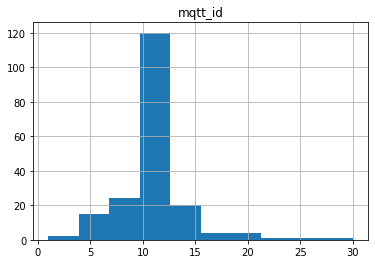

In [18]:
mqtt_count.hist()

In [20]:
#mqtt_count[mqtt_count['mqtt_id'] == 10]

In [55]:
#df['mqtt_id'].astype(str)

In [54]:
df[df['mqtt_id'].str.contains('ATemp')]

,sensor_id,Gebäude (#id),mqtt_id,letzteMessung,letzterWert,unit
0,469,AlfredRandtStr14 (#138),AI_Allg_ATemp,2022-09-13 15:00:00.000 +0200,19.7,°C
1,1046,AlfredRandtStr20 (#157),AI_Allg_ATemp,2022-09-13 15:00:00.000 +0200,18.9,°C
2,1907,Weverstr71d (#110),AI_Allg_ATemp,2022-09-13 13:49:25.000 +0200,17.1,°C
3,581,AalesunderStr10 (#143),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,20.0,°C
4,473,AalesunderStr9 (#141),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,19.3,°C
5,602,ArneburgerStr4 (#158),AI_Allg_rATemp,2022-09-13 15:00:20.000 +0200,18.1,°C
6,687,ArneburgerStr7 (#139),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,17.8,°C
7,1041,ErichKurzStr13 (#148),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,18.8,°C
8,478,Goetelstr99 (#145),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,19.7,°C
9,1050,JerichowerStr3 (#140),AI_Allg_rATemp,2022-09-13 15:00:00.000 +0200,15.5,°C
